In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Need to load and view geometry

In [2]:
FS = segyio.tools.cube('../data/FS2600-3000_2700-3100.sgy') #Farstack cube
MS = segyio.tools.cube('../data/MS2600-3000_2700-3100.sgy') #Midstack cube
NS = segyio.tools.cube('../data/NS2600-3000_2700-3100.sgy') #Nearstack cube

In [3]:
print(type(FS))
print(FS.shape)

<class 'numpy.ndarray'>
(101, 101, 1501)


In [5]:
with segyio.open('../data/FS2600-3000_2700-3100.sgy','r') as fs:
    print(fs.xlines[0], fs.xlines[-1])    

3000 3100


In [6]:
with segyio.open('../data/FS2600-3000_2700-3100.sgy','r') as fs:
    print(fs.ilines[0], fs.ilines[-1])    

2600 2700


In [10]:
filename = '../data/FS2600-3000_2700-3100.sgy'
with segyio.open(filename, "r") as segyfile:

    # Memory map file for faster reading (especially if file is big...)
    segyfile.mmap()

    # Print binary header info
    print(segyfile.bin)
    print(segyfile.bin[segyio.BinField.Traces])

    # Read headerword inline for trace 10
    print(segyfile.header[10][segyio.TraceField.INLINE_3D])

    # Print inline and crossline axis
    print(segyfile.xlines)
    print(segyfile.ilines)

{JobID: 2, LineNumber: 0, ReelNumber: 0, Traces: 0, AuxTraces: 0, Interval: 4000, IntervalOriginal: 0, Samples: 1501, SamplesOriginal: 0, Format: 1, EnsembleFold: 0, SortingCode: 4, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, SEGYRevision: 256, TraceFlag: 1, ExtendedHeaders: 0}
0
2600
[3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013
 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025 3026 3027
 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039 3040 3041
 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053 3054 3055
 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067 3068 3069
 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081 3082 3083
 3084 3085 3086 3087 3088 3089 3090 3091 30

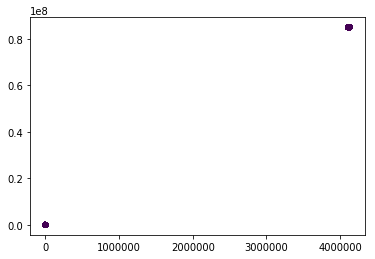

In [11]:
filename = '../data/FS2600-3000_2700-3100.sgy'
with segyio.open(filename, "r", ignore_geometry=True) as segyfile:
    segyfile.mmap()

    # Extract header word for all traces
    sourceX = segyfile.attributes(segyio.TraceField.SourceX)[:]
    
    # Scatter plot sources and receivers color-coded on their number
    plt.figure()
    sourceY = segyfile.attributes(segyio.TraceField.SourceY)[:]
    nsum = segyfile.attributes(segyio.TraceField.NSummedTraces)[:]
    plt.scatter(sourceX, sourceY, c=nsum, edgecolor='none')

    groupX = segyfile.attributes(segyio.TraceField.GroupX)[:]
    groupY = segyfile.attributes(segyio.TraceField.GroupY)[:]
    nstack = segyfile.attributes(segyio.TraceField.NStackedTraces)[:]
    plt.scatter(groupX, groupY, c=nstack, edgecolor='none')

In [3]:
filename = 'NS2990-2200_3000-2210.sgy'

# Build dataframe to hold the coordinates and inline/xline pairs
cdp = pd.DataFrame(columns=['cdp_x', 'cdp_y', 'cdp_inline', 'cdp_xline'])

with segyio.open(filename, "r", ignore_geometry=True) as segyfile:
    
    segyfile.mmap()

    # Extract header word for all traces
    cdp['cdp_x'] = segyfile.attributes(segyio.TraceField.CDP_X)[:]
    cdp['cdp_y'] = segyfile.attributes(segyio.TraceField.CDP_Y)[:]
    cdp['cdp_xline'] = segyfile.attributes(segyio.TraceField.CROSSLINE_3D)[:]
    cdp['cdp_inline'] = segyfile.attributes(segyio.TraceField.INLINE_3D)[:]
    
display_inline_max_xline_indx = cdp[cdp['cdp_inline']==inline_number]['cdp_xline'].idxmax()

In [4]:
cdp

,cdp_x,cdp_y,cdp_inline,cdp_xline
0,4240817,84900492,2990,2200
1,4240721,84900572,2990,2201
2,4240625,84900652,2990,2202
3,4240529,84900733,2990,2203
4,4240433,84900813,2990,2204
5,4240338,84900894,2990,2205
6,4240242,84900974,2990,2206
7,4240146,84901054,2990,2207
8,4240050,84901135,2990,2208
9,4239955,84901215,2990,2209


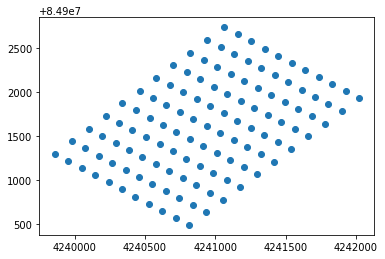

In [11]:
plt.figure()
plt.scatter(cdp['cdp_x'], cdp['cdp_y'])

In [13]:
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import Title

# output to static HTML file
# output_file("line.html")

# Write decimation of cdp_x and cdp_y
inline_step = 10
xline_step = 10


####

p = figure(plot_width=900, plot_height=900, match_aspect=True)
p.add_layout(Title(text="X coordinate (m)", align="center"), "below")
p.add_layout(Title(text="Y coordinate (m)", align="center"), "left")
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False

# add a circle renderer with a size, color, and alpha
p.circle(cdp['cdp_x'], cdp['cdp_y'], size=1, color="navy", alpha=0.5)



# show the results
show(p)

In [5]:
print(cdp['cdp_x'].idxmin())
print(cdp['cdp_x'].idxmax())
print(cdp['cdp_y'].idxmin())
print(cdp['cdp_y'].idxmax())

10
110
0
120


In [6]:
cdp.shape

(121, 4)

In [7]:
min_x_idx = cdp['cdp_x'].idxmin()
max_x_idx = cdp['cdp_x'].idxmax()
min_y_idx = cdp['cdp_y'].idxmin()
max_y_idx = cdp['cdp_y'].idxmax()

In [8]:
min_x = cdp.iloc[min_x_idx]
max_x = cdp.iloc[max_x_idx]
min_y = cdp.iloc[min_y_idx]
max_y = cdp.iloc[max_y_idx]

In [12]:
print(min_x)
print(max_x)
print(min_y)
print(max_y)

cdp_x          4107631
cdp_y         84916790
cdp_inline        2600
cdp_xline         3100
Name: 100, dtype: int32
cdp_x          4129259
cdp_y         84923118
cdp_inline        2700
cdp_xline         3000
Name: 10100, dtype: int32
cdp_x          4117207
cdp_y         84908755
cdp_inline        2600
cdp_xline         3000
Name: 0, dtype: int32
cdp_x          4119684
cdp_y         84931153
cdp_inline        2700
cdp_xline         3100
Name: 10200, dtype: int32


In [9]:
#cdp_polygon = pd.DataFrame(columns=['cdp_x', 'cdp_y', 'cdp_inline', 'cdp_xline'])

#d =cdp_polygon.append(cdp.iloc[min_x_idx], ignore_index=True)
#cdp_polygon
cdp_polygon = pd.concat([min_x, min_y, max_x, max_y], ignore_index=True, axis='columns').transpose()
cdp_polygon

,cdp_x,cdp_y,cdp_inline,cdp_xline
0,4239859,84901295,2990,2210
1,4240817,84900492,2990,2200
2,4242022,84901928,3000,2200
3,4241064,84902732,3000,2210


In [15]:
p = figure(plot_width=900, plot_height=900, match_aspect=True)
p.add_layout(Title(text="X coordinate (m)", align="center"), "below")
p.add_layout(Title(text="Y coordinate (m)", align="center"), "left")
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False

# add a circle renderer with a size, color, and alpha
p.circle(cdp['cdp_x'], cdp['cdp_y'], size=5, color="navy", alpha=0.5)


# outer polygon representing data footprint
p.multi_polygons(xs=[[[cdp_polygon['cdp_x'].values]]],
                 ys=[[[cdp_polygon['cdp_y'].values]]], fill_color=None, line_color='red')


# show the results
output_notebook()
show(p)

Loading BokehJS ...

In [23]:
cdp_polygon['cdp_x'].values

array([4107631, 4117207, 4129259, 4119684], dtype=int32)

In [24]:
xs=[[[[1, 1, 2, 2]]]]

In [25]:
type(xs)

list

In [26]:
inline = 
xline = 

SyntaxError: invalid syntax (<ipython-input-26-509e92853c90>, line 1)

In [34]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, Title
from bokeh.palettes import plasma
from bokeh.plotting import figure, output_file, show
from bokeh.transform import transform

# https://stackoverflow.com/questions/49833824/interactive-scatter-plot-in-bokeh-with-hover-tool

list_x = cdp['cdp_x']
list_y = cdp['cdp_y']
desc = [str((inline, xline)) for inline,xline in zip(cdp['cdp_inline'], cdp['cdp_xline'])]

source = ColumnDataSource(data=dict(x=list_x, y=list_y, desc=desc))
hover = HoverTool(tooltips=[
    ("(x,y)", "(@x, @y)"),
    ('(inline, xline)', '@desc'),
])

p = figure(plot_width=700, plot_height=700, match_aspect=True, tools=[hover, 'pan','wheel_zoom','reset'])
# 'box_zoom' tool has a bug that breaks match_aspect
# I think it is related to this: https://github.com/bokeh/bokeh/issues/8487

p.circle('x', 'y', source=source, size=5, color="navy", alpha=0.5)

p.multi_polygons(xs=[[[cdp_polygon['cdp_x'].values]]],
                 ys=[[[cdp_polygon['cdp_y'].values]]], fill_color=None, line_color='black')

p.add_layout(Title(text="X coordinate (m)", align="center"), "below")
p.add_layout(Title(text="Y coordinate (m)", align="center"), "left")
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False

#output_file('test.html')
output_notebook()
show(p)

Loading BokehJS ...

In [17]:
unique_ilines = cdp['cdp_inline'].unique()
unique_xlines = cdp['cdp_xline'].unique()

In [16]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, Title, CustomJS, Slider
from bokeh.palettes import plasma
from bokeh.plotting import figure, output_file, show
from bokeh.transform import transform
from bokeh.layouts import column

# https://stackoverflow.com/questions/49833824/interactive-scatter-plot-in-bokeh-with-hover-tool

list_x = cdp['cdp_x']
list_y = cdp['cdp_y']
desc = [str((inline, xline)) for inline,xline in zip(cdp['cdp_inline'], cdp['cdp_xline'])]

source = ColumnDataSource(data=dict(x=list_x, y=list_y, desc=desc))
hover = HoverTool(tooltips=[
    ("(x,y)", "(@x, @y)"),
    ('(inline, xline)', '@desc'),
])

p = figure(plot_width=700, plot_height=700, match_aspect=True, tools=[hover, 'pan','wheel_zoom','reset'])
# 'box_zoom' tool has a bug that breaks match_aspect
# I think it is related to this: https://github.com/bokeh/bokeh/issues/8487

# plot cpds
p.circle('x', 'y', source=source, size=5, color="navy", alpha=0.5)

# plot bounding cdps polygon
p.multi_polygons(xs=[[[cdp_polygon['cdp_x'].values]]],
                 ys=[[[cdp_polygon['cdp_y'].values]]], fill_color=None, line_color='black')

# plot inline
# plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
# slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

p.add_layout(Title(text="X coordinate (m)", align="center"), "below")
p.add_layout(Title(text="Y coordinate (m)", align="center"), "left")
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False

#output_file('test.html')
output_notebook()
show(p)

Loading BokehJS ...

In [20]:
cdp

,cdp_x,cdp_y,cdp_inline,cdp_xline
0,4117207,84908755,2600,3000
1,4117111,84908835,2600,3001
2,4117015,84908916,2600,3002
3,4116919,84908996,2600,3003
4,4116824,84909076,2600,3004
5,4116728,84909157,2600,3005
6,4116632,84909237,2600,3006
7,4116536,84909317,2600,3007
8,4116441,84909398,2600,3008
9,4116345,84909478,2600,3009


In [22]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# get XYs for inline to display
@interact(inline_number=(2600,2700,1))
def display_inline_min_and_max(inline_number):
    """
    Given inline number find its XYs edges
    """
    display_inline_min_xline_indx = cdp[cdp['cdp_inline']==inline_number]['cdp_xline'].idxmin()
    display_inline_max_xline_indx = cdp[cdp['cdp_inline']==inline_number]['cdp_xline'].idxmax()

    display_inline_min_xline = cdp.iloc[display_inline_min_xline_indx]
    display_inline_max_xline = cdp.iloc[display_inline_max_xline_indx]

    inline_polygon = pd.concat([display_inline_min_xline, display_inline_max_xline],
                               ignore_index=True, axis='columns').transpose()
    return inline_polygon

interactive(children=(IntSlider(value=2650, description='inline_number', max=2700, min=2600), Output()), _dom_…

In [33]:
inline_number = 2990
display_inline_min_xline_indx = cdp[cdp['cdp_inline']==inline_number]['cdp_xline'].idxmin()
display_inline_max_xline_indx = cdp[cdp['cdp_inline']==inline_number]['cdp_xline'].idxmax()
xxx = cdp[cdp['cdp_inline']==inline_number]
print(display_inline_min_xline_indx)
print(xxx)

0
      cdp_x     cdp_y  cdp_inline  cdp_xline
0   4240817  84900492        2990       2200
1   4240721  84900572        2990       2201
2   4240625  84900652        2990       2202
3   4240529  84900733        2990       2203
4   4240433  84900813        2990       2204
5   4240338  84900894        2990       2205
6   4240242  84900974        2990       2206
7   4240146  84901054        2990       2207
8   4240050  84901135        2990       2208
9   4239955  84901215        2990       2209
10  4239859  84901295        2990       2210


In [21]:
#inline_polygon = display_inline_min_and_max(2650)
inline_polygon



NameError: name 'inline_polygon' is not defined

In [23]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, Title, CustomJS, Slider
from bokeh.palettes import plasma
from bokeh.plotting import figure, output_file, show
from bokeh.transform import transform
from bokeh.layouts import column

# https://stackoverflow.com/questions/49833824/interactive-scatter-plot-in-bokeh-with-hover-tool

source = ColumnDataSource(cdp)
hover = HoverTool(tooltips=[
    ("(x, y)", "(@cdp_x, @cdp_y)"),
    ("(inline, xline)", "(@cdp_inline, @cdp_xline)"),
])

# Build figure
p = figure(plot_width=700, plot_height=700, match_aspect=True, tools=[hover, 'pan','wheel_zoom','reset'])
# 'box_zoom' tool has a bug that breaks match_aspect
# I think it is related to this: https://github.com/bokeh/bokeh/issues/8487

# plot cpds
p.circle('cdp_x', 'cdp_y', source=source, size=5, color="navy", alpha=0.5)

# plot bounding cdps polygon
p.multi_polygons(xs=[[[cdp_polygon['cdp_x'].values]]],
                 ys=[[[cdp_polygon['cdp_y'].values]]], fill_color=None, line_color='black')

# plot inline
p.line(inline_polygon['cdp_x'], inline_polygon['cdp_y'], line_width=3, line_alpha=0.6, line_color='red')
#slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")
slider = Slider(start=min(cdp['cdp_inline'].unique()),
                end=max(cdp['cdp_inline'].unique()),
                value=min(cdp['cdp_inline'].unique()),
                step=1,
                title="Inline")

update_curve = CustomJS(args=dict(source=ColumnDataSource(inline_polygon), slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    x = data['cdp_x']
    y = data['cdp_y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


p.add_layout(Title(text="X coordinate (m)", align="center"), "below")
p.add_layout(Title(text="Y coordinate (m)", align="center"), "left")
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False

show(column(slider, p))

#output_file('test.html')
output_notebook()
#show(p)

NameError: name 'inline_polygon' is not defined

In [18]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, Title, CustomJS, Slider
from bokeh.palettes import plasma
from bokeh.plotting import figure, output_file, show
from bokeh.transform import transform
from bokeh.layouts import column

# https://stackoverflow.com/questions/49833824/interactive-scatter-plot-in-bokeh-with-hover-tool

source = ColumnDataSource(cdp)
hover = HoverTool(tooltips=[
    ("(x, y)", "(@cdp_x, @cdp_y)"),
    ("(inline, xline)", "(@cdp_inline, @cdp_xline)"),
])

# Build figure
p = figure(plot_width=700, plot_height=700, match_aspect=True, tools=[hover, 'pan','wheel_zoom','reset'])
# 'box_zoom' tool has a bug that breaks match_aspect
# I think it is related to this: https://github.com/bokeh/bokeh/issues/8487

# plot cpds
p.circle('cdp_x', 'cdp_y', source=source, size=5, color="navy", alpha=0.5)

# plot bounding cdps polygon
p.multi_polygons(xs=[[[cdp_polygon['cdp_x'].values]]],
                 ys=[[[cdp_polygon['cdp_y'].values]]], fill_color=None, line_color='black')

# plot inline
p.line(inline_polygon['cdp_x'], inline_polygon['cdp_y'], line_width=3, line_alpha=0.6, line_color='red')


p.add_layout(Title(text="X coordinate (m)", align="center"), "below")
p.add_layout(Title(text="Y coordinate (m)", align="center"), "left")
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False


#output_file('test.html')
output_notebook()
show(p)

NameError: name 'inline_polygon' is not defined